In [2]:
import math
import matplotlib.pyplot as plt

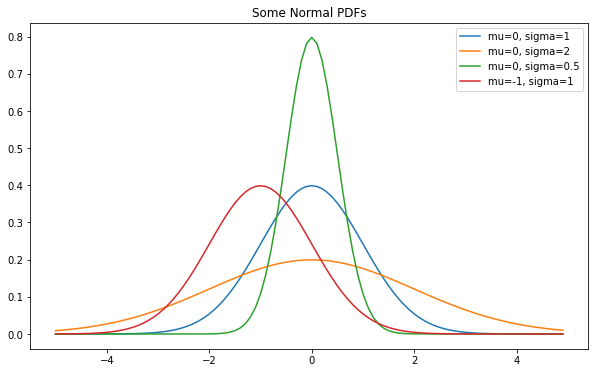

In [3]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt2pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (sqrt2pi * sigma)) 


xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(10, 6))
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], label='mu=-1, sigma=1')
plt.legend()
plt.title('Some Normal PDFs')
plt.show()

    

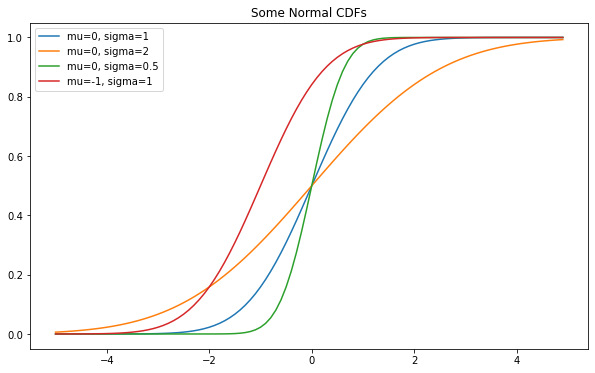

In [5]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(10, 6))
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], label='mu=-1, sigma=1')
plt.legend()
plt.title('Some Normal CDFs')
plt.show()

In [6]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z



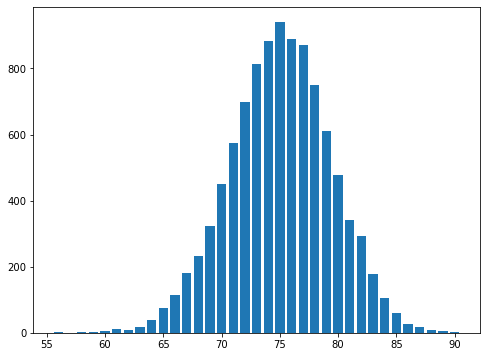

In [79]:
# binomial dist
import random
from collections import Counter

def bernoulli_trial(p):
    return random.random() < p

def binomial(n, p):
    counter = 0
    for _ in range(n):
        if bernoulli_trial(p):
            counter += 1
    return counter

def make_hist(n, p, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    return Counter(data)


hist = make_hist(100, 0.75, 10000)

plt.figure(figsize=(8, 6))
plt.bar(hist.keys(), hist.values())
plt.show()